In [2]:
import pandas as pd
import warnings
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
warnings.filterwarnings('ignore')
data=pd.read_csv('vehicles.csv')

state=480110301+470055131+480110725 # replace this number with the sum of the student IDs for the members of the group


# remove vehicles using electricity or natural gas
filtered1 = data[data.fuelType1!='Electricity']
filtered2 = filtered1[filtered1.fuelType1!='Natural Gas']
data1=filtered2[['fuelType1','comb08','displ','year','sCharger','tCharger','startStop','trany','cylinders','barrels08','drive','lv2','lv4','pv2','pv4']]
data1.head()
data1['sCharger'] = np.where(data1[['sCharger']]=='S', 1,0)
data1['tCharger'] = np.where(data1[['tCharger']]=='T', 1,0)
data1['trany'] = np.where((data1['trany'].str.slice(0, 9)=="Automatic")&(data1['trany']!=np.NaN), "Automatic","Manual")
data1['cylinders']=np.where(data1[['cylinders']]=="NA",np.NaN,data1[['cylinders']])
data1=data1.dropna()
data1['startStop']=np.where(data1[['startStop']]=='N',0,1)
data1.head()

train = data1.sample(frac=0.8, random_state=state)
test = data1[data1.index.isin(train.index)==False].copy() # Only for prediction

data2=train.reset_index(drop=True)
data3=test.reset_index(drop=True)

# you will need to do lots of data cleaning and preparation before any analysis. I recommend that you do this first 
# to the entire dataset, then apply the sampling commands above to the cleaned data set, to get your test and train samples.

In [3]:
data1.shape

(9109, 15)

In [4]:
train.shape

(7287, 15)

In [5]:
test.shape

(1822, 15)

In [6]:
# box plot of sCharge & tCharge

In [7]:
data2['high_economy']=np.where(data2['comb08']> 23.058020, 1, 0)
data2['high_displacement']=np.where(data2['displ']> 3.176778, 1, 0)

In [8]:
data2.head()

,fuelType1,comb08,displ,year,sCharger,tCharger,startStop,trany,cylinders,barrels08,drive,lv2,lv4,pv2,pv4,high_economy,high_displacement
0,Premium Gasoline,37,1.4,2012,0,0,1,Automatic,4.0,3.375621,Front-Wheel Drive,0,0,0,0,1,0
1,Regular Gasoline,31,1.0,2017,0,1,1,Automatic,3.0,10.632581,Front-Wheel Drive,0,13,0,90,1,0
2,Premium Gasoline,18,3.7,2013,0,0,0,Automatic,6.0,18.311667,All-Wheel Drive,0,0,0,0,0,1
3,Premium Gasoline,18,5.8,2014,1,0,0,Manual,8.0,18.311667,Rear-Wheel Drive,13,0,83,0,0,1
4,Premium Gasoline,25,2.0,2018,0,1,1,Automatic,4.0,13.184400,All-Wheel Drive,0,0,0,0,1,0


In [9]:
data2.describe()

,comb08,displ,year,sCharger,tCharger,startStop,cylinders,barrels08,lv2,lv4,pv2,pv4,high_economy,high_displacement
count,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000,7287.000000
mean,23.286538,3.171991,2015.882668,0.046658,0.407438,0.351585,5.640181,15.034247,1.449019,5.737478,12.464251,36.300124,0.426239,0.438452
std,6.094481,1.366955,2.414519,0.210921,0.491391,0.477498,1.848004,3.838007,3.678935,8.185913,29.753656,47.750853,0.494563,0.496231
min,10.000000,0.600000,2000.000000,0.000000,0.000000,0.000000,2.000000,1.049516,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,2.000000,2014.000000,0.000000,0.000000,0.000000,4.000000,12.207778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,3.000000,2016.000000,0.000000,0.000000,0.000000,6.000000,14.982273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26.500000,3.700000,2018.000000,0.000000,1.000000,1.000000,6.000000,17.347895,0.000000,13.000000,0.000000,96.000000,1.000000,1.000000
max,58.000000,8.400000,2020.000000,1.000000,1.000000,1.000000,16.000000,32.961000,22.000000,47.000000,102.000000,157.000000,1.000000,1.000000


In [11]:
data2['displ_high']=np.where(data2['displ']>5.2,1,0)
data2['displ_low']=np.where(data2['displ']<=2.6,1,0)
data2['displ_medium']=np.where(data2['displ']<=5.2,1,0)-data2['displ_low']
data2['displ_level']=data2['displ_high']*3+data2['displ_medium']*2+data2['displ_low']
data2.head()

,fuelType1,comb08,displ,year,sCharger,tCharger,startStop,trany,cylinders,barrels08,...,lv2,lv4,pv2,pv4,high_economy,high_displacement,displ_high,displ_low,displ_medium,displ_level
0,Premium Gasoline,37,1.4,2012,0,0,1,Automatic,4.0,3.375621,...,0,0,0,0,1,0,0,1,0,1
1,Regular Gasoline,31,1.0,2017,0,1,1,Automatic,3.0,10.632581,...,0,13,0,90,1,0,0,1,0,1
2,Premium Gasoline,18,3.7,2013,0,0,0,Automatic,6.0,18.311667,...,0,0,0,0,0,1,0,0,1,2
3,Premium Gasoline,18,5.8,2014,1,0,0,Manual,8.0,18.311667,...,13,0,83,0,0,1,1,0,0,3
4,Premium Gasoline,25,2.0,2018,0,1,1,Automatic,4.0,13.184400,...,0,0,0,0,1,0,0,1,0,1


Box plot  for each level of displacement

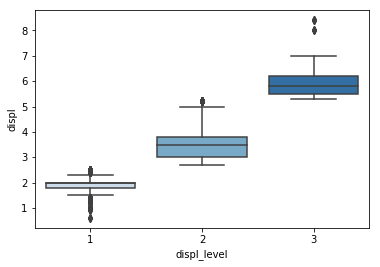

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='displ_level',y='displ',data=data2,palette='Blues')

描述

Displacement scatter plot

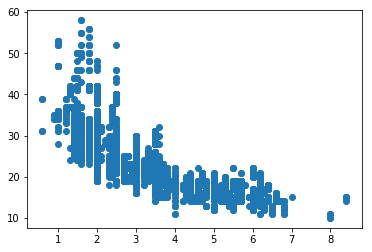

In [13]:
plt.scatter(data2['displ'],data2['comb08'])

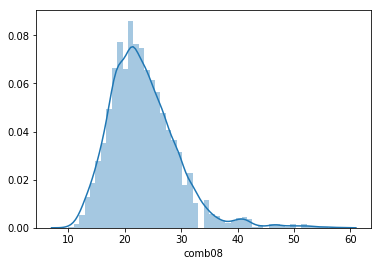

In [9]:
sns.distplot(data2['comb08'],bins=50)

In [10]:
## Box plot of fuelType1

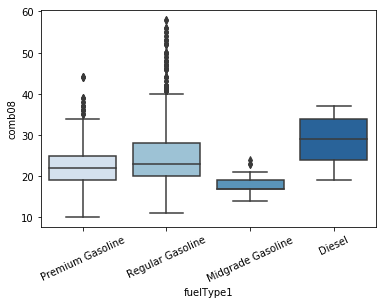

In [11]:
sns.boxplot(data2['fuelType1'], data2['comb08'], palette='Blues')
plt.xticks(rotation=25)
plt.draw()

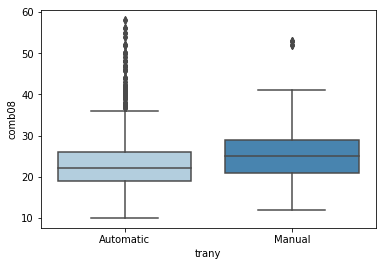

In [12]:
sns.boxplot(data2['trany'], data2['comb08'], palette='Blues')
plt.draw()

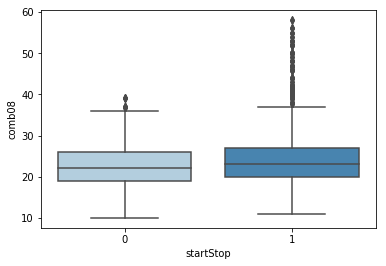

In [13]:
sns.boxplot(data2['startStop'], data2['comb08'], palette='Blues')
plt.draw()

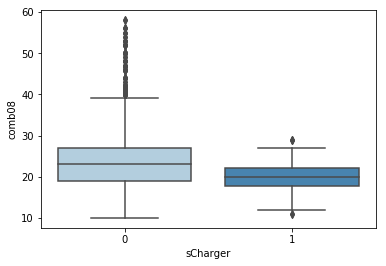

In [14]:
sns.boxplot(data2['sCharger'], data2['comb08'], palette='Blues')
plt.draw()

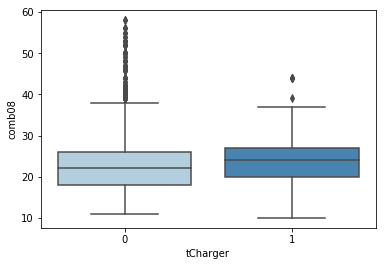

In [15]:
sns.boxplot(data2['tCharger'], data2['comb08'], palette='Blues')
plt.draw()

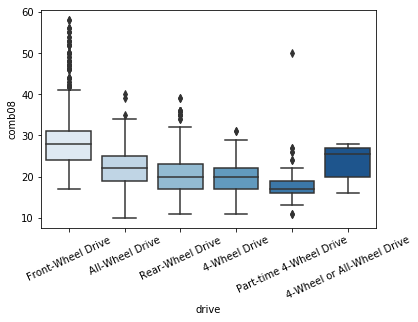

In [16]:
sns.boxplot(data2['drive'], data2['comb08'], palette='Blues')
plt.xticks(rotation=25)
plt.draw()

## Chi test

In [17]:
# chi-test
from scipy.stats import chi2_contingency
tab=pd.crosstab(data2['high_economy'],data2['high_displacement'])
print(tab)
chi2_contingency(tab)

high_displacement     0     1
high_economy                 
0                  1138  3043
1                  2954   152


(3333.1074404451447, 0.0, 1, array([[2347.83202964, 1833.16797036],
        [1744.16797036, 1361.83202964]]))

Hypotheses to test whether differences shown in the contingency table is significant:

$H_0:$ the fuel economy and engine dispacement are independent.

$H_1:$ the fuel economy and engine dispacement are related.

$\alpha=0.05$ is chosen as standard. 

Python gives the test statistic as $V=3333.11$, which follows a $\chi^2_1$ distribution under the null hypothesis with 1 degrees of freedom. The p-value is given as $P(\chi^2_1 \geq 3333.11) = 0$. The p-value $< 0.05$, so reject null hypothesis and conclude that fuel economy and engindisplacement is significantly related to each other at the 5% significant level.

**Assumptions:**

1. All 4 expected values are $\geq 5$. In this case, the smallest expected value is 1361.83, which is larger than 5. This satisfies the first assumption.

2. Each observed count in the table is counting independent events and that those counts follow a Poisson distribution. The sample is a "thinned" random sample therefore this assumption is satisfied.

# T-test

In [41]:
high_displ = data2.loc[data2['displ_level']==3,'comb08']

In [43]:
from scipy import stats
stats.ttest_ind(data2['comb08'],high_displ, equal_var = False)

Ttest_indResult(statistic=66.42755780463179, pvalue=0.0)

H0: the two group the fuel economy and the fuel economy with high engine dispacement has same mean.(µ1=µ2)

H1: the mean of group the fuel economy are higher than the mean of the return with high engine dispacement (µ1>µ2 ).

Assume the significance level is 0.05

Test statistics is 66.428 which follows a t-distribution under the null hypothesis with 7285 degrees of freedom.

P-value: The probability that a t-distribution distribution would be as high as 66.428 is 0

Conclusion: H0 was rejected. There is sufficient evidence that the fuel economy are higher than the mean of the return with high engine dispacement. It means level of engine dispacement has effect on the fuel economy.

Check assumption: 
1.They are thined sample which choosed by computer randomly,so data are identically independently distributed.

2.Two groups are independent of each other，beacuse they are thined sample, two groups of data do not affect each other.

2.Refer to boxplot for each level of displacement, we can see less outlier, so each group are conform the finite 4th moment.

# Median test

In [49]:
from scipy.stats import median_test
median_test(data2['comb08'],high_displ,ties='ignore')

(909.6861129593613, 7.694645415705607e-200, 22.0, array([[3629,    0],
        [3123,  891]], dtype=int64))

H0: the two group the fuel economy and the fuel economy with high engine dispacement has same median (µ1=µ2)

H1: the median of group the fuel economy are higher than the fuel economy with high engine dispacement (µ1>µ2 )

Assume the significance level is 0.05.

Test statistics is 909.686, which follows a chi square distribution under the null hypothesis with 22 degrees of freedom.

P-value: The probability that a chi-square distribution would be as high as 909.686 is 7.695*10**-200

Conclusion: H0 was rejected. There is sufficient evidence that the median of group the fuel economy are higher than the fuel economy with high engine dispacement(µ1>µ2 ), it means . It means level of engine dispacement has effect on the fuel economy.

Check assumption:

1.They are thined sample which choosed by computer randomly,so data are identically independently distributed.

2.They are thined sample， so, two groups are independent of each other，beacuse two groups of data do not affect each other.

3.Each cell in the contingency table has expected value at least 5，its expected values are 1738,0,1106,898.

4.Data are at least on the ordinal scale，because data can be sorted by size.

5.Each group has at least 5 observations, so that CLT holds.

## Median test

In [18]:
auto = data2.loc[data2['displ_level']=='1','comb08']
manual = data2.loc[data2['displ_level']=="3",'comb08']

In [19]:
from scipy.stats import median_test
median_test(auto,manual,ties='ignore')

(133.37933571728152, 7.468679734326393e-31, 22.0, array([[2877,  752],
        [2799,  324]], dtype=int64))

Median test hypothesis:

$H_0:\mbox{median}_{automatic~transmission}=\mbox{median}_{manual~transmission}$

$H_1: \mbox{median}_{automatic~transmission}\neq \mbox{median}_{manual~transmission}$

I choose $\alpha=0.05$ as standard.


The contingency table can presented as follows:

|            |Automatic transmission | Manual transmission | Total|
|-----------------|-----------|---------------------|---------------|
|Above median     |               |    |             |
|0            |2877           | 752          |3629|
|(expected)      |3050.7         | 578.3      |    |
|1           |2799        |324           |3123|
|(expected}     |2625.3       |497.7       |    |
|Total        |5676             |1076      |6752|

As the contingency table shown above, the four observed counts and expected counts are not equal under independence, which means ther proportiion of data points above the ovarll median is different in the two groups.

The default for the median test is to use Pearson's Method. The test statistic is $133.38$, which follows a $\chi^2_1$ distribution under null hypothesis. In this case, the p-value is $P(\chi^2_1>133.38)=7.47e^{-31} \approx 0$. This is $<0.05$, thus there is sufficient evidence to reject null hypothsis. We conclude that the median of fuel economy of vehicle with automatic transmission is no equal to that with manual transmission, thus the type of transmission significantly affects fuel economy of vehicles.

The median test only gives the two-sided p-value. Thus I did the two-sided test here.

Assumptions:

1. The two groups automatic transmission and manual transmission are independent. This assumption is satisfied by choosing a random "thinned" sample.
2. Each cell in the contingency table has expected value at least 5. All expected values in the contingency table are much greater than 5, which satisfies this assumption.
3. Data are i.i.d in each group. This assumption is satisfied by choosing a random "thinned" sample.
4. Data are at least on the ordinal scale. Fuel economy is a numeric variable, so this is satisfied.

# WM test 

In [24]:
startStop = data2.loc[data2['startStop']==1,'comb08']
no_startStop = data2.loc[data2['startStop']==0,'comb08']

In [28]:
from scipy.stats import mannwhitneyu
mannwhitneyu(startStop,no_startStop,alternative='two-sided')

MannwhitneyuResult(statistic=6799890.5, pvalue=2.586848313049513e-18)

H0: The fuel economy has the same distribution on cars which have startstop and cars which do not have startstop.

H1: The fuel economy has the distribution shifted upward on cars which have startstop.

Assume the significance level 𝛼 is 0.05

Test statistics is 6799890.5 , which follows a normal distribution

P-value: The probability that a normal distribution would be as high as 6799890.5 is 2.587*10**-18

Conclusion: H0 was rejected. There is sufficient evidence that The fuel economy has the distribution shifted upward on cars which have startstop. it means startstop and the fuel economy have correlation.

Check assumption:

1.It is thined sample which choosed by computer randomly,so data are identically independently distributed.

2.Two groups are independent of each other，beacuse they are thined sample, so two groups of data do not affect each other.

3.Each group has at least 8 observations, so that CLT holds.

4.Data are at least on the ordinal scale，because data can be sorted by size.

## Multiple scatter plots

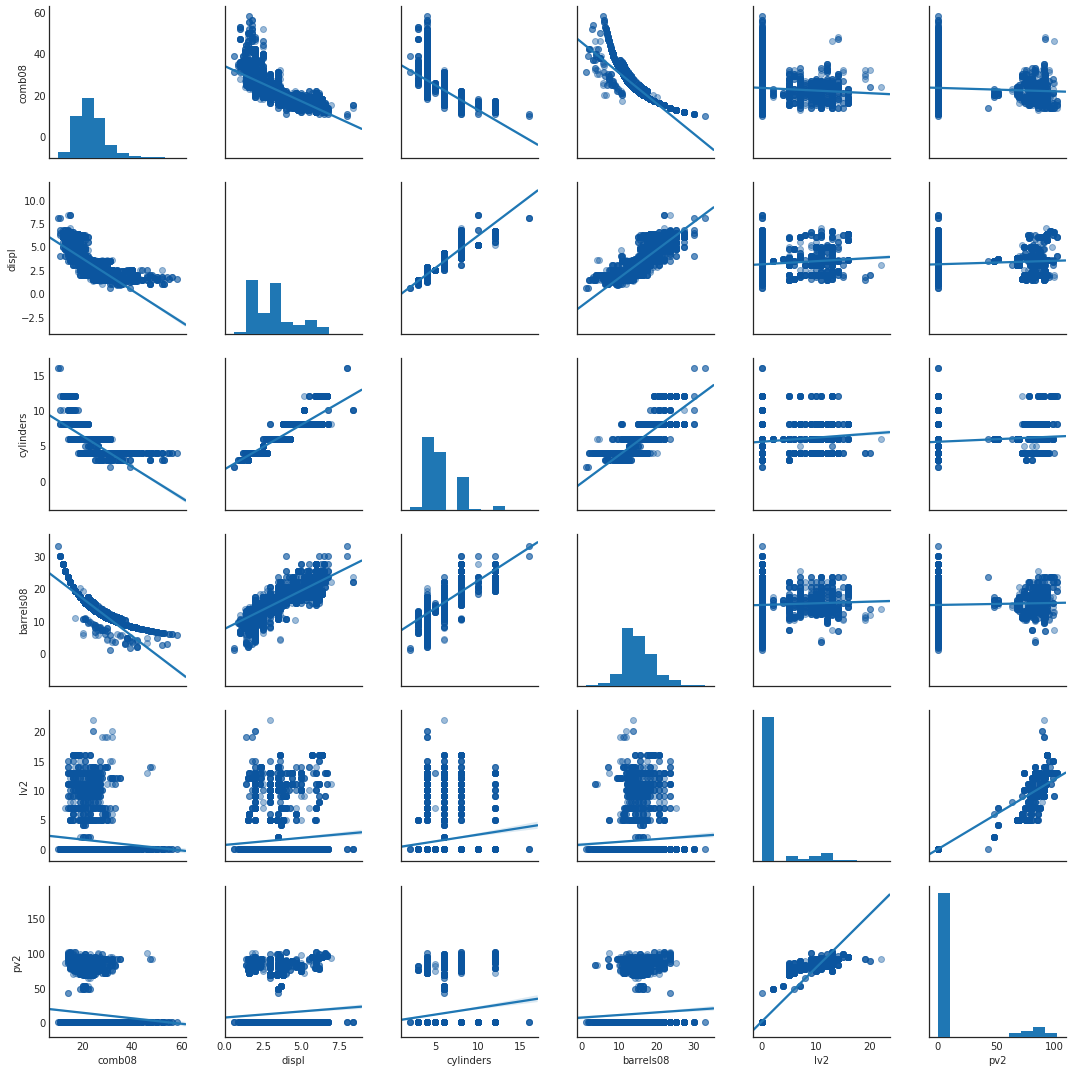

In [20]:
variables=['comb08','displ','cylinders','barrels08','lv2','pv2']
with sns.axes_style('white'):
    g=sns.pairplot(data2[variables], kind='reg', 
                   plot_kws={'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})
plt.tight_layout()

Clear negative relationships exist between fuel economy and cylinders, fuel economy and engin displacement, fuel economy and annual consumption in barrels. These negative relationships may be curved in stead of linear. The relationships between fuel economy and luggage volume, fuel economy and passenger volume are unclear. Fuel economy also seems to have constant variance with each of these variables.

In terms of the predictors, strong positive linear relationships seem very clear between engin displacement and annual consumtion in barrels, engin displacement and number of engin sylinders, passenger volome and luggagre volome. !!!(These suggest moderate to fairly strong correlations between the predictors, none are too strong or high enough to cause any problems at this stage: multi-collinearity doesn't appear to be a big issue here.

In [21]:
data2['transmission']=np.where(data2['trany']=="Automatic",1,0)

In [22]:
data2.head()

,fuelType1,comb08,displ,year,sCharger,tCharger,startStop,trany,cylinders,barrels08,drive,lv2,lv4,pv2,pv4,high_economy,high_displacement,transmission
0,Premium Gasoline,37,1.4,2012,0,0,1,Automatic,4.0,3.375621,Front-Wheel Drive,0,0,0,0,1,0,1
1,Regular Gasoline,31,1.0,2017,0,1,1,Automatic,3.0,10.632581,Front-Wheel Drive,0,13,0,90,1,0,1
2,Premium Gasoline,18,3.7,2013,0,0,0,Automatic,6.0,18.311667,All-Wheel Drive,0,0,0,0,0,1,1
3,Premium Gasoline,18,5.8,2014,1,0,0,Manual,8.0,18.311667,Rear-Wheel Drive,13,0,83,0,0,1,0
4,Premium Gasoline,25,2.0,2018,0,1,1,Automatic,4.0,13.184400,All-Wheel Drive,0,0,0,0,1,0,1


In [23]:
data2.shape

(7287, 18)

# LAD

In [48]:
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
reg=smf.quantreg('comb08~displ', data2)
res = reg.fit(q=.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                 comb08   Pseudo R-squared:               0.4227
Model:                       QuantReg   Bandwidth:                      0.7188
Method:                 Least Squares   Sparsity:                        6.314
Date:                Tue, 28 May 2019   No. Observations:                 7287
Time:                        14:19:11   Df Residuals:                     7285
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.8824      0.093    341.171      0.000      31.699      32.066
displ         -2.9412      0.027   -108.708      0.000      -2.994      -2.888
==============================================================================
"""

In [69]:
# SER value
resid_f=res.resid
fit1=res.fittedvalues
res.mse_resid**0.5

4.107220418029238

In [51]:
# Residual over X
Resid_slr = res.resid
Fit_slr=res.fittedvalues

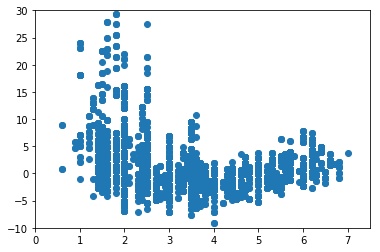

In [68]:
plt.scatter(data2['displ'], Resid_slr)
plt.ylim(-10,30)
plt.xlim(0,7.5)
plt.show()

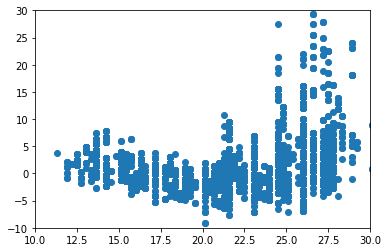

In [61]:
# Redisual over fit
plt.scatter(Fit_slr, Resid_slr)
plt.ylim(-10,30)
plt.xlim(10,30)
plt.show()

The LSA are: linearity and  𝐸(𝜀|𝑋)=0 . The residual plot suggests that linearity could hold, .We do not know how the data are collected, so whether it is independent and identically distributed is assumed but not known. The data are fuel economies, which are positive and hence bounded below. Fuel economy has no clear outliers from the plots above, and presumably is also bounded above by some natural limit, and so it seems safe to propose that fuel economy have finite 4th moments. The size engin displacement also has natural and phsical limits and contraints: thus is bounded and automatically has finite 4th moments too, as do the dummy variables sCharger, tCharger, startStop and transmission. Refer to the residual plot, residual varies with the variation of X, so they do not have constant error variance,it is homoskedasticity.

In [77]:
formula = 'comb08 ~ C(displ_level) + C(fuelType1): C(displ_level)'
reg4 = smf.ols(formula = formula, data = data2).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1048.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        13:50:21   Log-Likelihood:                -20481.
No. Observations:                7287   AIC:                         4.098e+04
Df Residuals:                    7277   BIC:                         4.105e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                              32.6829      0.444     73.545      0.000      31.812      33.554
C(displ_level)[T.2]                                    -8.0963      0.643    -12.592      0.000      -9.357      -6.836
C(displ_level)[T.3]                                   -12.0955      0.363    -33.292      0.000     -12.808     -11.383
C(fuelType1)[T.Midgrade Gasoline]:C(displ_level)[1] -2.737e-14   1.11e-15    -24.704      0.000   -2.95e-14   -2.52e-14
C(fuelType1)[T.Premium Gasoline]:C(displ_level)[1]     -6.3505      0.460    -13.794      0.000      -7.253      -5.448
C(fuelType1)[T.Regular Gasoline]:C(displ_level)[1]     -3.7887      0.453     -8.356      0.000      -4.677      -2.900
C(fuelType1)[T.Midgrade Gasoline]:C(displ_level)[2]    -2.7117      1.497     -1.812      0.070      -5.646       0.222
C(fuelType1)[T.Premium Gasoline]:C(displ_level)[2]     -4.0896      0.474     -8.630      0.000      -5.019      -3.161
C(fuelType1)[T.Regular Gasoline]:C(displ_level)[2]     -4.5420      0.479     -9.490      0.000      -5.480      -3.604
C(fuelType1)[T.Midgrade Gasoline]:C(displ_level)[3]    -3.3017      0.402     -8.209      0.000      -4.090      -2.513
C(fuelType1)[T.Premium Gasoline]:C(displ_level)[3]     -5.0011      0.230    -21.732      0.000      -5.452      -4.550
C(fuelType1)[T.Regular Gasoline]:C(displ_level)[3]     -3.7926      0.229    -16.576      0.000      -4.241      -3.344
==============================================================================
Omnibus:                     2959.802   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21765.691
Skew:                           1.772   Prob(JB):                         0.00
Kurtosis:                      10.690   Cond. No.                     2.35e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [78]:
from statsmodels.stats.anova import anova_lm
table = sm.stats.anova_lm(reg4, typ=1)
reg4.mse_resid**0.5

4.024150519603275

In [85]:
# table
table = sm.stats.anova_lm(reg4,typ = 1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(displ_level),2.0,144419.656398,72209.828199,4459.106841,0.000000e+00
C(fuelType1):C(displ_level),9.0,8403.722652,933.746961,57.660814,2.719727e-102
Residual,7277.0,117842.190942,16.193787,NaN,NaN


## Full MLR - Heter

In [24]:
data2['displ'].describe()

count    7287.000000
mean        3.171991
std         1.366955
min         0.600000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: displ, dtype: float64

In [25]:
data2['med_displ']=np.where(data2['displ']>2.6,1,0)-np.where(data2['displ']>=5.2,1,0)
data2['high_displ']=np.where(data2['displ']>=5.2,1,0)

In [26]:
data2.head()

,fuelType1,comb08,displ,year,sCharger,tCharger,startStop,trany,cylinders,barrels08,drive,lv2,lv4,pv2,pv4,high_economy,high_displacement,transmission,med_displ,high_displ
0,Premium Gasoline,37,1.4,2012,0,0,1,Automatic,4.0,3.375621,Front-Wheel Drive,0,0,0,0,1,0,1,0,0
1,Regular Gasoline,31,1.0,2017,0,1,1,Automatic,3.0,10.632581,Front-Wheel Drive,0,13,0,90,1,0,1,0,0
2,Premium Gasoline,18,3.7,2013,0,0,0,Automatic,6.0,18.311667,All-Wheel Drive,0,0,0,0,0,1,1,1,0
3,Premium Gasoline,18,5.8,2014,1,0,0,Manual,8.0,18.311667,Rear-Wheel Drive,13,0,83,0,0,1,0,0,1
4,Premium Gasoline,25,2.0,2018,0,1,1,Automatic,4.0,13.184400,All-Wheel Drive,0,0,0,0,1,0,1,0,0


In [27]:
model1 = smf.ols(formula='comb08 ~ displ+sCharger+tCharger+transmission+startStop+cylinders+barrels08',data=data2)
reg_f = model1.fit(cov_type='HC0')
reg_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     2994.
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        21:33:52   Log-Likelihood:                -16516.
No. Observations:                7287   AIC:                         3.305e+04
Df Residuals:                    7279   BIC:                         3.310e+04
Df Model:                           7                                         
Covariance Type:                  HC0                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.9247      0.255    175.860      0.000      44.424      45.425
displ           -0.6661      0.077     -8.660      0.000      -0.817      -0.515
sCharger        -1.0059      0.147     -6.845      0.000      -1.294      -0.718
tCharger        -1.0019      0.083    -12.119      0.000      -1.164      -0.840
transmission    -0.1286      0.065     -1.992      0.046      -0.255      -0.002
startStop        0.3306      0.068      4.851      0.000       0.197       0.464
cylinders        0.5188      0.057      9.181      0.000       0.408       0.630
barrels08       -1.4636      0.027    -54.072      0.000      -1.517      -1.411
==============================================================================
Omnibus:                     4049.030   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66972.580
Skew:                           2.306   Prob(JB):                         0.00
Kurtosis:                      17.118   Cond. No.                         95.4
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

# ANOVA

In [100]:
#formula = 'comb08 ~ displ_low+displ_medium'
formula = 'comb08 ~ C(displ_level)'
reg4 = smf.ols(formula = formula, data = data2).fit()
reg4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     4168.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        15:47:49   Log-Likelihood:                -20730.
No. Observations:                7287   AIC:                         4.147e+04
Df Residuals:                    7284   BIC:                         4.149e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              28.0967      0.074    382.139      0.000      27.953      28.241
C(displ_level)[T.2]    -7.6749      0.104    -73.690      0.000      -7.879      -7.471
C(displ_level)[T.3]   -11.8206      0.157    -75.213      0.000     -12.129     -11.512
==============================================================================
Omnibus:                     3077.461   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21932.766
Skew:                           1.869   Prob(JB):                         0.00
Kurtosis:                      10.633   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
formula = 'comb08 ~ C(displ_level)'
lm = smf.ols(formula = formula, data = data2).fit()
lm.summary()
from statsmodels.stats.anova import anova_lm
table = sm.stats.anova_lm(lm, typ=1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(displ_level),2.0,144419.656398,72209.828199,4167.732428,0.0
Residual,7284.0,126202.052947,17.325927,NaN,NaN


In [102]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data2['comb08'],data2['displ_level'])
result = mc.tukeyhsd()
print(result)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper   reject
----------------------------------------------
  1      2    -7.6749  -7.9191 -7.4308   True 
  1      3    -11.8206 -12.189 -11.4521  True 
  2      3    -4.1456  -4.5143 -3.7769   True 
----------------------------------------------


In [96]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data2['comb08'],data2['fuelType1'])
result = mc.tukeyhsd()
print(result)

         Multiple Comparison of Means - Tukey HSD,FWER=0.05         
      group1            group2      meandiff  lower    upper  reject
--------------------------------------------------------------------
      Diesel      Midgrade Gasoline -11.0125 -13.1695 -8.8554  True 
      Diesel       Premium Gasoline -6.9909  -8.2221  -5.7597  True 
      Diesel       Regular Gasoline -4.3016  -5.5309  -3.0724  True 
Midgrade Gasoline  Premium Gasoline  4.0215   2.213    5.8301  True 
Midgrade Gasoline  Regular Gasoline  6.7108   4.9036   8.5181  True 
 Premium Gasoline  Regular Gasoline  2.6893    2.33    3.0486  True 
--------------------------------------------------------------------


In [103]:
reg4.params

Intercept              28.096724
C(displ_level)[T.2]    -7.674927
C(displ_level)[T.3]   -11.820555
dtype: float64

In [104]:
reg4.bse

Intercept              0.073525
C(displ_level)[T.2]    0.104151
C(displ_level)[T.3]    0.157162
dtype: float64

In [105]:
reg4.conf_int(alpha=0.05)

,0,1
Intercept,27.952594,28.240854
C(displ_level)[T.2],-7.879094,-7.470761
C(displ_level)[T.3],-12.128637,-11.512472


In [106]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data2['comb08'],data2['fuelType1'])
result = mc.tukeyhsd()
print(result)

         Multiple Comparison of Means - Tukey HSD,FWER=0.05         
      group1            group2      meandiff  lower    upper  reject
--------------------------------------------------------------------
      Diesel      Midgrade Gasoline -11.0125 -13.1695 -8.8554  True 
      Diesel       Premium Gasoline -6.9909  -8.2221  -5.7597  True 
      Diesel       Regular Gasoline -4.3016  -5.5309  -3.0724  True 
Midgrade Gasoline  Premium Gasoline  4.0215   2.213    5.8301  True 
Midgrade Gasoline  Regular Gasoline  6.7108   4.9036   8.5181  True 
 Premium Gasoline  Regular Gasoline  2.6893    2.33    3.0486  True 
--------------------------------------------------------------------


In [109]:
reg4.params

Intercept              28.096724
C(displ_level)[T.2]    -7.674927
C(displ_level)[T.3]   -11.820555
dtype: float64

In [110]:
reg4.bse

Intercept              0.073525
C(displ_level)[T.2]    0.104151
C(displ_level)[T.3]    0.157162
dtype: float64

In [111]:
reg4.conf_int(alpha=0.05)

,0,1
Intercept,27.952594,28.240854
C(displ_level)[T.2],-7.879094,-7.470761
C(displ_level)[T.3],-12.128637,-11.512472


In [114]:
model5 = smf.ols(formula='comb08 ~ C(displ_level) + C(fuelType1) + C(displ_level): C(fuelType1)', data=data2) 
reg5 = model3.fit()
reg5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     1048.
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        15:53:44   Log-Likelihood:                -20481.
No. Observations:                7287   AIC:                         4.098e+04
Df Residuals:                    7277   BIC:                         4.105e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                32.6829      0.444     73.545      0.000      31.812      33.554
C(displ_level)[T.2]                                      -8.0963      0.643    -12.592      0.000      -9.357      -6.836
C(displ_level)[T.3]                                      -8.7836      0.202    -43.385      0.000      -9.180      -8.387
C(fuelType1)[T.Midgrade Gasoline]                        -3.1084      0.575     -5.404      0.000      -4.236      -1.981
C(fuelType1)[T.Premium Gasoline]                         -6.3505      0.460    -13.794      0.000      -7.253      -5.448
C(fuelType1)[T.Regular Gasoline]                         -3.7887      0.453     -8.356      0.000      -4.677      -2.900
C(displ_level)[T.2]:C(fuelType1)[T.Midgrade Gasoline]     0.3968      0.970      0.409      0.683      -1.506       2.299
C(displ_level)[T.3]:C(fuelType1)[T.Midgrade Gasoline]    -3.5052      0.552     -6.345      0.000      -4.588      -2.422
C(displ_level)[T.2]:C(fuelType1)[T.Premium Gasoline]      2.2609      0.661      3.422      0.001       0.966       3.556
C(displ_level)[T.3]:C(fuelType1)[T.Premium Gasoline]     -1.9625      0.256     -7.670      0.000      -2.464      -1.461
C(displ_level)[T.2]:C(fuelType1)[T.Regular Gasoline]     -0.7533      0.659     -1.143      0.253      -2.046       0.539
C(displ_level)[T.3]:C(fuelType1)[T.Regular Gasoline]     -3.3158      0.249    -13.314      0.000      -3.804      -2.828
==============================================================================
Omnibus:                     2959.802   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21765.691
Skew:                           1.772   Prob(JB):                         0.00
Kurtosis:                      10.690   Cond. No.                     2.88e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [115]:
reg5.mse_resid**0.5

4.024150519603275

In [116]:
t1 = (-7.9191 - (-7.4308))/2/0.104151
from scipy.stats import t
t1, t.cdf(t1,7284)

(-2.3441925665620142, 0.009547524340185925)

In [120]:
1-2*t.cdf(t1,7277)

0.9809049256059609

In [119]:
table = sm.stats.anova_lm(reg5, typ=1) # Type 1 ANOVA DataFrame. Homoskedastic ANOVA only.
table

,df,sum_sq,mean_sq,F,PR(>F)
C(displ_level),2.0,144419.656398,72209.828199,4459.106841,0.000000e+00
C(fuelType1),3.0,5018.132496,1672.710832,103.293367,1.752297e-65
C(displ_level):C(fuelType1),6.0,3343.680330,557.280055,34.413201,3.155411e-41
Residual,7277.0,117842.190942,16.193787,NaN,NaN


In [121]:
reg5.params

Intercept                                                32.682927
C(displ_level)[T.2]                                      -8.096260
C(displ_level)[T.3]                                      -8.783559
C(fuelType1)[T.Midgrade Gasoline]                        -3.108440
C(fuelType1)[T.Premium Gasoline]                         -6.350487
C(fuelType1)[T.Regular Gasoline]                         -3.788715
C(displ_level)[T.2]:C(fuelType1)[T.Midgrade Gasoline]     0.396773
C(displ_level)[T.3]:C(fuelType1)[T.Midgrade Gasoline]    -3.505213
C(displ_level)[T.2]:C(fuelType1)[T.Premium Gasoline]      2.260878
C(displ_level)[T.3]:C(fuelType1)[T.Premium Gasoline]     -1.962506
C(displ_level)[T.2]:C(fuelType1)[T.Regular Gasoline]     -0.753309
C(displ_level)[T.3]:C(fuelType1)[T.Regular Gasoline]     -3.315841
dtype: float64

The prediction equation taken directly from the OLS output is: 𝑀𝑃𝐺ˆ= 32.682927-8.096260×displ_medium-8.783559×displ_high-3.108440×Midgrade Gasoline-6.350487×Premium Gasoline-3.788715×Regular Gasoline

After calculating the estimated average Price at each combination of levels of displacement and fuel types. Clearly, price is estimated highest when displacement level is 1 and the fuel type is Diesel

In [122]:
reg5.params

Intercept                                                32.682927
C(displ_level)[T.2]                                      -8.096260
C(displ_level)[T.3]                                      -8.783559
C(fuelType1)[T.Midgrade Gasoline]                        -3.108440
C(fuelType1)[T.Premium Gasoline]                         -6.350487
C(fuelType1)[T.Regular Gasoline]                         -3.788715
C(displ_level)[T.2]:C(fuelType1)[T.Midgrade Gasoline]     0.396773
C(displ_level)[T.3]:C(fuelType1)[T.Midgrade Gasoline]    -3.505213
C(displ_level)[T.2]:C(fuelType1)[T.Premium Gasoline]      2.260878
C(displ_level)[T.3]:C(fuelType1)[T.Premium Gasoline]     -1.962506
C(displ_level)[T.2]:C(fuelType1)[T.Regular Gasoline]     -0.753309
C(displ_level)[T.3]:C(fuelType1)[T.Regular Gasoline]     -3.315841
dtype: float64

In [123]:
reg5.bse

Intercept                                                0.444393
C(displ_level)[T.2]                                      0.642964
C(displ_level)[T.3]                                      0.202455
C(fuelType1)[T.Midgrade Gasoline]                        0.575198
C(fuelType1)[T.Premium Gasoline]                         0.460388
C(fuelType1)[T.Regular Gasoline]                         0.453394
C(displ_level)[T.2]:C(fuelType1)[T.Midgrade Gasoline]    0.970464
C(displ_level)[T.3]:C(fuelType1)[T.Midgrade Gasoline]    0.552417
C(displ_level)[T.2]:C(fuelType1)[T.Premium Gasoline]     0.660711
C(displ_level)[T.3]:C(fuelType1)[T.Premium Gasoline]     0.255882
C(displ_level)[T.2]:C(fuelType1)[T.Regular Gasoline]     0.659263
C(displ_level)[T.3]:C(fuelType1)[T.Regular Gasoline]     0.249042
dtype: float64

In [124]:
reg5.conf_int(alpha = 0.05)

,0,1
Intercept,31.811787,33.554066
C(displ_level)[T.2],-9.356656,-6.835865
C(displ_level)[T.3],-9.180431,-8.386688
C(fuelType1)[T.Midgrade Gasoline],-4.235995,-1.980885
C(fuelType1)[T.Premium Gasoline],-7.252981,-5.447994
C(fuelType1)[T.Regular Gasoline],-4.677499,-2.899932
C(displ_level)[T.2]:C(fuelType1)[T.Midgrade Gasoline],-1.505617,2.299164
C(displ_level)[T.3]:C(fuelType1)[T.Midgrade Gasoline],-4.588111,-2.422316
C(displ_level)[T.2]:C(fuelType1)[T.Premium Gasoline],0.965693,3.556062
C(displ_level)[T.3]:C(fuelType1)[T.Premium Gasoline],-2.464109,-1.460902


In [125]:
t1 = (-13.170-8.855)/2/0.575198
from scipy.stats import t
t1 , t.cdf(t1,103.293)

(-19.14558117378711, 4.657207244081964e-36)

In [126]:
1-2*t.cdf(t1,7277)

1.0

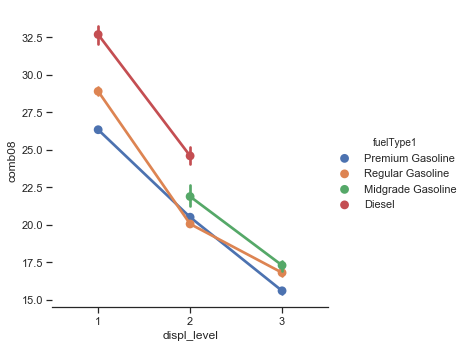

In [127]:
import seaborn as sns
sns.set(style="ticks")
g = sns.factorplot(x="displ_level", y="comb08", hue="fuelType1", data=data2)
g.despine(left=True)
#sns.plt.show()

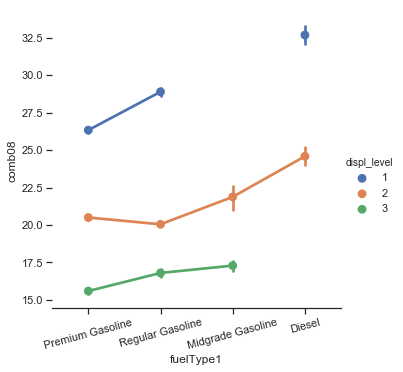

In [128]:
import seaborn as sns
sns.set(style="ticks")
# plt.xticks(rotation = 15)
g = sns.factorplot(x="fuelType1", y="comb08", hue="displ_level", data=data2)
plt.xticks(rotation = 15)
g.despine(left=True)

# anova

In [79]:
formula = 'comb08 ~ C(displ_level) + C(drive): C(displ_level)'
reg3 = smf.ols(formula = formula, data = data2).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     684.3
Date:                Thu, 30 May 2019   Prob (F-statistic):               0.00
Time:                        14:03:47   Log-Likelihood:                -20162.
No. Observations:                7287   AIC:                         4.036e+04
Df Residuals:                    7270   BIC:                         4.048e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                   24.4331      0.308     79.434      0.000      23.830      25.036
C(displ_level)[T.2]                                         -4.4637      0.360    -12.401      0.000      -5.169      -3.758
C(displ_level)[T.3]                                         -7.5890      0.399    -19.037      0.000      -8.370      -6.808
C(drive)[T.4-Wheel or All-Wheel Drive]:C(displ_level)[1]     2.9419      1.397      2.106      0.035       0.204       5.680
C(drive)[T.All-Wheel Drive]:C(displ_level)[1]                0.7661      0.339      2.260      0.024       0.102       1.430
C(drive)[T.Front-Wheel Drive]:C(displ_level)[1]              5.4308      0.320     16.987      0.000       4.804       6.058
C(drive)[T.Part-time 4-Wheel Drive]:C(displ_level)[1]        5.2335      1.603      3.264      0.001       2.091       8.376
C(drive)[T.Rear-Wheel Drive]:C(displ_level)[1]               1.4686      0.371      3.960      0.000       0.742       2.196
C(drive)[T.4-Wheel or All-Wheel Drive]:C(displ_level)[2]     5.1734      1.469      3.523      0.000       2.294       8.052
C(drive)[T.All-Wheel Drive]:C(displ_level)[2]                0.4730      0.224      2.116      0.034       0.035       0.911
C(drive)[T.Front-Wheel Drive]:C(displ_level)[2]              1.7885      0.266      6.716      0.000       1.266       2.310
C(drive)[T.Part-time 4-Wheel Drive]:C(displ_level)[2]       -1.8241      0.402     -4.533      0.000      -2.613      -1.035
C(drive)[T.Rear-Wheel Drive]:C(displ_level)[2]               0.3333      0.217      1.537      0.124      -0.092       0.758
C(drive)[T.4-Wheel or All-Wheel Drive]:C(displ_level)[3]     1.5195      1.189      1.278      0.201      -0.812       3.851
C(drive)[T.All-Wheel Drive]:C(displ_level)[3]               -2.2999      0.502     -4.578      0.000      -3.285      -1.315
C(drive)[T.Front-Wheel Drive]:C(displ_level)[3]          -1.541e-14   4.25e-15     -3.627      0.000   -2.37e-14   -7.08e-15
C(drive)[T.Part-time 4-Wheel Drive]:C(displ_level)[3]       -2.5997      0.628     -4.140      0.000      -3.831      -1.369
C(drive)[T.Rear-Wheel Drive]:C(displ_level)[3]              -0.4287      0.304     -1.412      0.158      -1.024       0.167
==============================================================================
Omnibus:                     2949.379   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21150.164
Skew:                           1.773   Prob(JB):                         0.00
Kurtosis:                      10.555   Cond. No.                     1.51e+18
===============================================================

In [80]:
from statsmodels.stats.anova import anova_lm
table = sm.stats.anova_lm(reg3, typ=1)
reg3.mse_resid**0.5

3.8541005530493284

In [81]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data2['comb08'],data2['displ_level'])
rlesult = mc.tukeyhsd()
print(result)
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparisonj
mc = MultiComparison(data2['comb08'],data2['drive'])
result = mc.tukeyhsd()
print(result)

t1 = (-7.9191 - (-7.4308))/2/0.104151
from scipy.stats import t
t1, t.cdf(t1,7284)
1-2*t.cdf(t1,519)
table = sm.stats.anova_lm(reg3, typ=1)
reg3.params 
reg3.conf_int(alpha = 0.05)
t1 = (0.268-5.768)/2/0.778741
from scipy.stats import t
t1 , t.cdf(t1,198.17)
1-2*t.cdf(t1,7279)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper   reject
----------------------------------------------
  1      2    -7.6749  -7.9191 -7.4308   True 
  1      3    -11.8206 -12.189 -11.4521  True 
  2      3    -4.1456  -4.5143 -3.7769   True 
----------------------------------------------
                  Multiple Comparison of Means - Tukey HSD,FWER=0.05                  
          group1                     group2           meandiff  lower    upper  reject
--------------------------------------------------------------------------------------
      4-Wheel Drive        4-Wheel or All-Wheel Drive  3.0181   0.268    5.7683  True 
      4-Wheel Drive             All-Wheel Drive        2.1753   1.5921   2.7585  True 
      4-Wheel Drive            Front-Wheel Drive       8.5067   7.9456   9.0679  True 
      4-Wheel Drive         Part-time 4-Wheel Drive   -2.4315  -3.6014  -1.2616  True 
      4-Wheel Drive             Rear-Wheel Drive       0.2

0.9995839825380691

In [82]:
import statsmodels.formula.api as smf
from statsmodels.regression.quantile_regression import QuantReg
reg=smf.quantreg('comb08~displ', data2)
res = reg.fit(q=.5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                 comb08   Pseudo R-squared:               0.4227
Model:                       QuantReg   Bandwidth:                      0.7188
Method:                 Least Squares   Sparsity:                        6.314
Date:                Thu, 30 May 2019   No. Observations:                 7287
Time:                        14:05:42   Df Residuals:                     7285
                                        Df Model:                            1
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.8824      0.093    341.171      0.000      31.699      32.066
displ         -2.9412      0.027   -108.708      0.000      -2.994      -2.888
==============================================================================
"""

In [86]:
table = sm.stats.anova_lm(reg3,typ = 1)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(displ_level),2.0,144419.656398,72209.828199,4861.275446,0.000000e+00
C(drive):C(displ_level),15.0,18217.199057,1214.479937,81.760636,2.096727e-232
Residual,7270.0,107989.242101,14.854091,NaN,NaN


## Goodness of fit:

In [28]:
resid_f=reg_f.resid
fit1=reg_f.fittedvalues
reg_f.mse_resid**0.5

2.3350847553425953

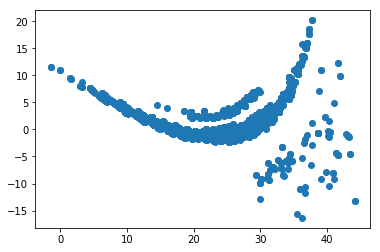

In [78]:
plt.scatter(fit1,resid_f)

The residual vs fitted values plot above suggest that the residuals are almost all positive for the lower predicted values, say predictions of fuel economy $\approx 15$. Forpredicted values higher than this the residuals seem to average 0. The variance of the residuals also seems to increase as the predicted values get higher, suggesting that het-robust SEs is more suitalbe of this data.

In [30]:
features = data2[['displ','sCharger','tCharger','transmission','startStop','cylinders','barrels08']]
features = sm.add_constant(features)
features.head()

,const,displ,sCharger,tCharger,transmission,startStop,cylinders,barrels08
0,1.0,1.4,0,0,1,1,4.0,3.375621
1,1.0,1.0,0,1,1,1,3.0,10.632581
2,1.0,3.7,0,0,1,0,6.0,18.311667
3,1.0,5.8,1,0,0,0,8.0,18.311667
4,1.0,2.0,0,1,1,1,4.0,13.184400


In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(5):
    vif.append(variance_inflation_factor(features.values, i+1))
    
print(vif)
print(sum(vif)/len(vif))

[10.437912172262447, 1.0866847380755784, 1.497199854328654, 1.0562591764742673, 1.2854118494220383]
3.072693558112597


The maximum variance inflation factor (VIF) = $10.44 >5$. The mean VIF is also > 3. Thus, the variance inflation and collinearity is a major issue in this data.Clearly, the correlations between the predictors are causing high degree of variance inflation, which means omitted variable bias exists.

The LSA are: linearity and $E(\varepsilon|X)=0$. The residual plot suggests that linearity could hold, except perhaps for vehicles with very low fuel economy, where most residuals are positive.We do not know how the data are collected, so whether it is independent and identically distributed is assumed but not known. The data are fuel economies, which are positive and hence bounded below. Fuel economy has no clear outliers from the plots above, and presumably is also bounded above by some natural limit, and so it seems safe to propose that fuel economy have finite 4th moments. The sizes of barrels, cylinders,engin displacement also have natural and phsical limits and contraints: thus is bounded and automatically has finite 4th moments too, as do the dummy variables sCharger, tCharger, startStop and transmission. LSA is about perfect conllinearity, which clearly exists here as maximum VIF > 5 and average VIF > 3.

This full model has $SER=2.335$, $R^2=0.853$,$r_{adj}^2=0.853$. Clearly it is quite strong fits to the data. However, failure to satisfy LSA 5 makes this model poorly fit the data.

## Model to check OVB

In [80]:
model_ovb = smf.ols(formula='displ ~ cylinders+barrels08',data=data2)
reg_ovb = model_ovb.fit(cov_type='HC0')
reg_ovb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  displ   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     9610.
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        23:06:30   Log-Likelihood:                -4986.6
No. Observations:                7287   AIC:                             9979.
Df Residuals:                    7284   BIC:                         1.000e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1567      0.029    -39.525      0.000      -1.214      -1.099
cylinders      0.5434      0.008     71.234      0.000       0.528       0.558
barrels08      0.0841      0.003     28.660      0.000       0.078       0.090
==============================================================================
Omnibus:                      641.894   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1779.474
Skew:                           0.489   Prob(JB):                         0.00
Kurtosis:                       5.215   Cond. No.                         67.4
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

Hypothesis testing:
    
$H_0:\beta_1=beta_2=0$

$H_1:$ At least one of $\beta_1,\beta_2 \neq 0$

I choose $\alpha=0.05$ as standard. I assume MLR LSA 1-5. The test statistic is $F_{stat}=9610$ which follows an $F_{2,7284}$ distribution under the null hypothesis. The p-value is $P(F_{5,7284}>9610)=0$. Since the p-value $<0.05$ we reject the null and conclude that at least one of the predictors is significantly linearly related to fuel economy.

This suggests that cylinders and barrels significantly related to both fuel economy and engin displacement and cause omitted variable bias in the previous model. Therefore cylinder and barrels should be removed from the prediction model.

 ## Reduced model 1:
 
 To deal with this issue, a reduced MLR model is conducted below.

In [32]:
model2 = smf.ols(formula='comb08 ~ displ+sCharger+tCharger+transmission+startStop',data=data2)
reg_r1 = model2.fit(cov_type='HC0')
reg_r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1934.
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        21:33:52   Log-Likelihood:                -19786.
No. Observations:                7287   AIC:                         3.958e+04
Df Residuals:                    7281   BIC:                         3.963e+04
Df Model:                           5                                         
Covariance Type:                  HC0                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.3805      0.171    207.101      0.000      35.046      35.715
displ           -3.5853      0.042    -86.187      0.000      -3.667      -3.504
sCharger        -3.1389      0.198    -15.870      0.000      -3.527      -2.751
tCharger        -3.2306      0.125    -25.898      0.000      -3.475      -2.986
transmission    -0.1312      0.120     -1.095      0.274      -0.366       0.104
startStop        2.4225      0.128     18.957      0.000       2.172       2.673
==============================================================================
Omnibus:                     2654.064   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14466.808
Skew:                           1.659   Prob(JB):                         0.00
Kurtosis:                       9.053   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [33]:
resid_r1=reg_r1.resid
fit2=reg_r1.fittedvalues
reg_r1.mse_resid**0.5

3.6574470422043897

As expected, the variables sCharger(supercharged), tCharger (turbocharged), transmission, being of med_displ (median engin displacement) and high_displ(high engin displacement) are all negatively related to fuel economy, whilst startStop (start-stop system) has a negative relationship with fuel economy; each being partial effects whilst holding all other variables constan. The effects of each variable can be summarized as:

$\hat{Fuel~economy}=35.3805-3.5853\times Displ-3.1389 \times sCharger-3.2306 \times tCharger -0.1312 \times Tranmission +2.4225 \times startStop+\varepsilon$

1. Keeping all other variables constant, 1 $cm^3$ increase of engin displacement associated with an average decrease in the fuel economy of $3.5853$ MPG.
2. . Keeping all other variables constant, having supercharger is associated with an average decrease in the fuel economy of $3.1389$ MPG.
3. Keeping all other variables constant, having turbocharger is associated with an average decrease in the fuel economy of $3.2306$ MPG.
4. Keeping all other variables constant, having automatic transimission is associated with an average decrease in fuel economy of $0.1312$ MPG.
5. Keeping all other variables constant, having start-stop system is associated with an average increase in fuel economy of $2.4225$ MPG.

Hypothesis testing:

$H_0: \beta_1=\beta_2=\beta_3=\beta_4=\beta_5=\beta_6=0$

$H_1:$ At least one of $\beta_1,..,\beta_6 \neq 0$

I choose $\alpha=0.05$ as standard. I assume MLR LSA 1-5. The test statistic is $F_{stat}=1934$ which follows an $F_{5,7281}$ distribution under the null hypothesis. The p-value is $P(F_{5,7281}>1934)=0$. Since the p-value $<0.05$ we reject the null and conclude that at least one of the predictors is significantly linearly related to fuel economy.

## Goodness of fit

Text(0.5,0,'Fitted value')

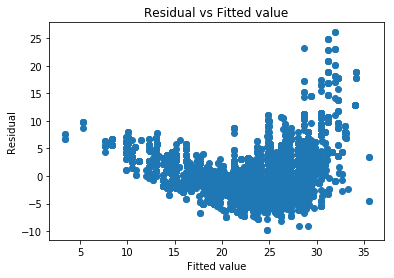

In [34]:
plt.scatter(fit2,resid_r1)
plt.title("Residual vs Fitted value")
plt.ylabel("Residual")
plt.xlabel("Fitted value")

The residual vs fitted values plot above suggests that the residuals are almost all positive for the lower preicted values, say predictions of fuel economy $\approx 13$. For predicted values higher than this the residuals seem to average 0. The variance of the residuals also seems to increase as the predictd values get higher, suggesting het-robust SEs is suitable for this data.

In [35]:
features1 = data2[['med_displ','high_displ','sCharger','tCharger','transmission','startStop']]
features1 = sm.add_constant(features1)
features1.head()

,const,med_displ,high_displ,sCharger,tCharger,transmission,startStop
0,1.0,0,0,0,0,1,1
1,1.0,0,0,0,1,1,1
2,1.0,1,0,0,0,1,0
3,1.0,0,1,1,0,0,0
4,1.0,0,0,0,1,1,1


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif1 = []
for i in range(5):
    vif1.append(variance_inflation_factor(features1.values, i+1))
    
print(vif1)

[1.2118079266295951, 1.2113329628375573, 1.0688919673403008, 1.1920576979455721, 1.0560789746212962]


The maximum VIF = $1.21<5$. The mean VIF is also $<3$. Thus,after removing the predictors number of cylinders and annual petroleum  consumption in barrels, variance inflation and collinearity do not seem to be a major issue in this data. Clearly, the correlations between the predictors are causing some degree of variance inflation, up to a factor of just below 3 for the variable median engin displacement(med_displ).

The LSA are: linearity and $E(\varepsilon|X)=0$. The residual plot suggests that linearity could hold, except perhaps for vehicles with very low fuel economy, where most residuals are positive.We do not know how the data are collected, so whether it is independent and identically distributed is assumed but not known. The data are fuel economies, which are positive and hence bounded below. Fuel economy has no clear outliers from the plots above, and presumably is also bounded above by some natural limit, and so it seems safe to propose that fuel economy have finite 4th moments. The size engin displacement also has natural and phsical limits and contraints: thus is bounded and automatically has finite 4th moments too, as do the dummy variables sCharger, tCharger, startStop and transmission. LSA is about perfect conllinearity, which clearly does not exist here as maximum VIF < 5 and average VIF < 3. This reduced model well fits the data as all assumptions are satisfied.

## Reduced model 2

In [74]:
model3 = smf.ols(formula='comb08 ~ displ+sCharger',data=data2)
reg_r2 = model3.fit(cov_type='HC0')
reg_r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     4185.
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        21:50:39   Log-Likelihood:                -20416.
No. Observations:                7287   AIC:                         4.084e+04
Df Residuals:                    7284   BIC:                         4.086e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9492      0.144    235.823      0.000      33.667      34.231
displ         -3.3387      0.037    -91.191      0.000      -3.410      -3.267
sCharger      -1.5481      0.146    -10.574      0.000      -1.835      -1.261
==============================================================================
Omnibus:                     3569.281   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29412.503
Skew:                           2.190   Prob(JB):                         0.00
Kurtosis:                      11.814   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

As expected,from our analyses so far, the variables engin displacement and sCharger are both negative related to fuel economy. The effect of each variable can be summarized as:

$\hat{Fuel~economy}=33.94-3.3387 \times Displ-1.5481 \times sCharger+\varepsilon$

In [38]:
resid_r2=reg_r2.resid
fit3=reg_r2.fittedvalues
reg_r2.mse_resid**0.5

3.9866393081705183

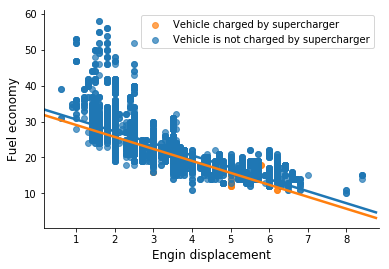

In [39]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
#tableau[0]=sns.color_palette('Blues')[-1]

fig, ax= plt.subplots()

index=data2['sCharger']==1
sns.regplot(data2.loc[index, 'displ'], data2.loc[index, 'comb08'], label='Vehicle charged by supercharger', ci=None, fit_reg=False, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})

index=data2['sCharger']==0
sns.regplot(data2.loc[index, 'displ'], data2.loc[index, 'comb08'], label='Vehicle is not charged by supercharger', ci=None, fit_reg=False, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 0.7})

a=ax.get_xlim()[0]
b=ax.get_xlim()[1]
x=np.arange(a, b, 0.1)
y=reg_r2.predict({'displ': x, 'sCharger': np.zeros(len(x))})
ax.plot(x, y, color=tableau[0], linewidth=2.5)
y=reg_r2.predict({'displ': x, 'sCharger': np.ones(len(x))})
ax.plot(x, y, color=tableau[1], linewidth=2.5)
ax.set_xlim(a, b)

ax.set_xlabel('Engin displacement',  {'fontsize': 12})
ax.set_ylabel('Fuel economy', {'fontsize': 12})
plt.legend(loc='best')

sns.despine()

Since there are no interaction effects in the model, the single binary predictor sCharger's inclusion the model means we get two parallel lines as predictions of fuel economy, when plot against engin displcement.

We can also see the clear positive association between engin displacement and sCharger: almost all vehicles charged by supercharger has lower fuel economy than those are not charged by super charger.

## Hypothesis testing:

$H_0: \beta_1=\beta_2=0$

$H_1:$ At least one of $\beta_1,\beta_2 \neq 0$

I choose  α=0.05  as standard. I assume MLR LSA 1-5. The test statistic is $F_{stat}=4185$ which follows an $F_{2,7284}$ distribution under the null hypothesis. The p-value is $P(F_{2,7284}>4185)=0$. Since the p-value $<0.05$ we reject the null and conclude that at least one of the predictors is significantly linearly related to fuel economy.

## Reduced model 3

In [40]:
model4 = smf.ols(formula='comb08 ~ displ+transmission',data=data2)
reg_r3 = model4.fit(cov_type='HC0')
reg_r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     4382.
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        21:33:53   Log-Likelihood:                -20438.
No. Observations:                7287   AIC:                         4.088e+04
Df Residuals:                    7284   BIC:                         4.090e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       33.7832      0.146    231.606      0.000      33.497      34.069
displ           -3.3765      0.039    -86.873      0.000      -3.453      -3.300
transmission     0.2537      0.122      2.076      0.038       0.014       0.493
==============================================================================
Omnibus:                     3537.740   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28677.774
Skew:                           2.171   Prob(JB):                         0.00
Kurtosis:                      11.694   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [41]:
resid_r3=reg_r3.resid
fit4=reg_r3.fittedvalues
reg_r3.mse_resid**0.5

3.9988084525645213

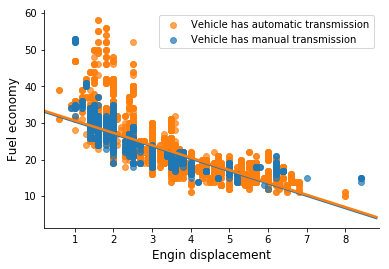

In [42]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
#tableau[0]=sns.color_palette('Blues')[-1]

fig, ax= plt.subplots()

index=data2['transmission']==1
sns.regplot(data2.loc[index, 'displ'], data2.loc[index, 'comb08'], label='Vehicle has automatic transmission', ci=None, fit_reg=False, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})

index=data2['transmission']==0
sns.regplot(data2.loc[index, 'displ'], data2.loc[index, 'comb08'], label='Vehicle has manual transmission', ci=None, fit_reg=False, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 0.7})

a=ax.get_xlim()[0]
b=ax.get_xlim()[1]
x=np.arange(a, b, 0.1)
y=reg_r3.predict({'displ': x, 'transmission': np.zeros(len(x))})
ax.plot(x, y, color=tableau[0], linewidth=2.5)
y=reg_r3.predict({'displ': x, 'transmission': np.ones(len(x))})
ax.plot(x, y, color=tableau[1], linewidth=2.5)
ax.set_xlim(a, b)

ax.set_xlabel('Engin displacement',  {'fontsize': 12})
ax.set_ylabel('Fuel economy', {'fontsize': 12})
plt.legend(loc='best')

sns.despine()

Since there are no interaction effects in the model, the single binary predictor transmission's inclusion the model means we get two parallel lines as predictions of fuel economy, when plot against engin displcement.

We can also see the there are nearly no relationship between type of transmission and engin displacement as the two lines nearly stick to each other.

## Hypothesis testing:

$H_0: \beta_1=\beta_2=0$

$H_1:$ At least one of $\beta_1,\beta_2 \neq 0$

I choose  α=0.05  as standard. I assume MLR LSA 1-5. The test statistic is $F_{stat}=4382$ which follows an $F_{2,7284}$ distribution under the null hypothesis. The p-value is $P(F_{2,7284}>4382)=0$. Since the p-value $<0.05$ we reject the null and conclude that at least one of the predictors is significantly linearly related to fuel economy.

## Reduced model 4

In [43]:
model5 = smf.ols(formula='comb08 ~ displ+startStop',data=data2)
reg_r4 = model5.fit(cov_type='HC0')
reg_r4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4702.
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        21:33:54   Log-Likelihood:                -20349.
No. Observations:                7287   AIC:                         4.070e+04
Df Residuals:                    7284   BIC:                         4.073e+04
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.4089      0.125    267.805      0.000      33.164      33.653
displ         -3.3371      0.036    -93.629      0.000      -3.407      -3.267
startStop      1.3161      0.112     11.755      0.000       1.097       1.536
==============================================================================
Omnibus:                     3211.860   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22500.550
Skew:                           1.977   Prob(JB):                         0.00
Kurtosis:                      10.647   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [44]:
resid_r4=reg_r4.resid
fit5=reg_r4.fittedvalues
reg_r4.mse_resid**0.5

3.950324645746427

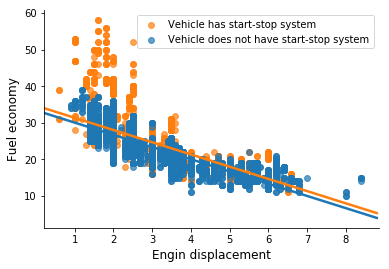

In [45]:
tableau=['#1F77B4', '#FF7F0E', '#2CA02C', '#DB2728', '#9467BD', '#8c564b', '#e377c2', '#7f7f7f']
#tableau[0]=sns.color_palette('Blues')[-1]

fig, ax= plt.subplots()

index=data2['startStop']==1
sns.regplot(data2.loc[index, 'displ'], data2.loc[index, 'comb08'], label='Vehicle has start-stop system', ci=None, fit_reg=False, scatter_kws={'s': 35, 'color': tableau[1], 'alpha': 0.7})

index=data2['startStop']==0
sns.regplot(data2.loc[index, 'displ'], data2.loc[index, 'comb08'], label='Vehicle does not have start-stop system', ci=None, fit_reg=False, scatter_kws={'s': 35, 'color': tableau[0], 'alpha': 0.7})

a=ax.get_xlim()[0]
b=ax.get_xlim()[1]
x=np.arange(a, b, 0.1)
y=reg_r4.predict({'displ': x, 'startStop': np.zeros(len(x))})
ax.plot(x, y, color=tableau[0], linewidth=2.5)
y=reg_r4.predict({'displ': x, 'startStop': np.ones(len(x))})
ax.plot(x, y, color=tableau[1], linewidth=2.5)
ax.set_xlim(a, b)

ax.set_xlabel('Engin displacement',  {'fontsize': 12})
ax.set_ylabel('Fuel economy', {'fontsize': 12})
plt.legend(loc='best')

sns.despine()

Since there are no interaction effects in the model, the single binary predictor startStop's inclusion the model means we get two parallel lines as predictions of fuel economy, when plot against engin displcement.

We can also see the there are nearly no relationship between startStop and engin displacement as the two lines nearly stick to each other.

## Hypothesis testing:

$H_0: \beta_1=\beta_2=0$

$H_1:$ At least one of $\beta_1,\beta_2 \neq 0$

I choose  α=0.05  as standard. I assume MLR LSA 1-5. The test statistic is $F_{stat}=4702$ which follows an $F_{2,7284}$ distribution under the null hypothesis. The p-value is $P(F_{2,7284}>4702)=0$. Since the p-value $<0.05$ we reject the null and conclude that at least one of the predictors is significantly linearly related to fuel economy.

## Strength of fit of both model

|    |$SER$|$R^2$|$R_{adj.}^2$|
|-----|------|-----|------|
|Reduced model 1|3.657|0.640|0.640|
|Reduced model 2|3.987|0.572|0.572|
|Reduced model 3|3.999|0.570|0.569|
|Reduced model 4|3.950|0.580|0.580|


The first reduced model has the highest $R^2$ captures about $64$% of the variation in fuel economy, with a lowest typical prediction error of about $3.657$ MPG, which the strongest fit the data model among the four reduced models.

## Log transformation

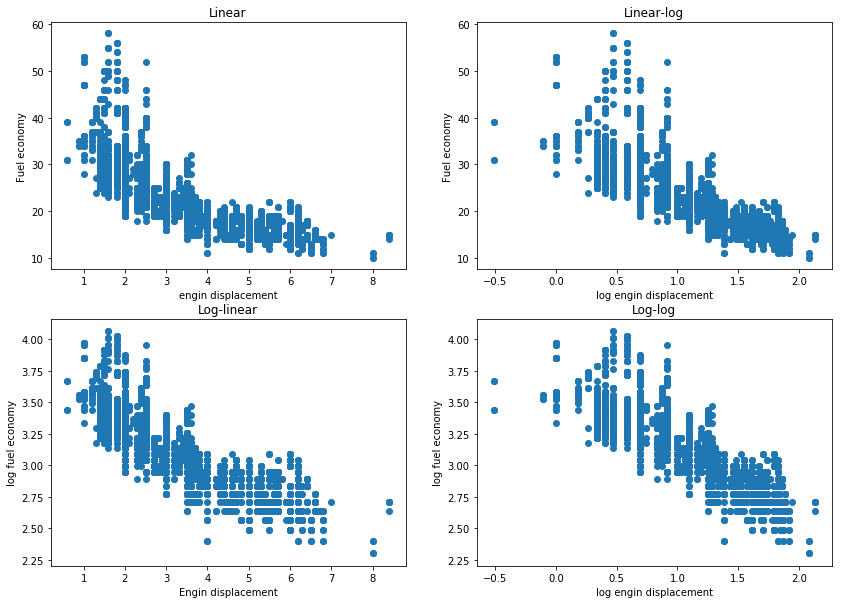

In [81]:
data2['log_eco'] = np.log(data2['comb08'])
data2['log_displ'] = np.log(data2['displ'])
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.scatter(data2['displ'],data2['comb08'])
ax1.set(title='Linear', ylabel='Fuel economy', xlabel='engin displacement')
ax2.scatter(data2['log_displ'],data2['comb08'])
ax2.set(title='Linear-log', ylabel='Fuel economy', xlabel='log engin displacement')
ax3.scatter(data2['displ'],data2['log_eco'])
ax3.set(title='Log-linear', ylabel='log fuel economy', xlabel='Engin displacement')
ax4.scatter(data2['log_displ'],data2['log_eco'])
ax4.set(title='Log-log', ylabel='log fuel economy', xlabel='log engin displacement')
plt.show()

The plots are challenging to rank, to my eye. The fuel economy vs engin displacement relationship is clearly curved, as is that for log fuel economy vs engin displacement; so these two rank 3rd and 4th, but their respective order seems tough to assess. Clearly, the fuel economy vs log engin displacement and log fuel economy vs log engin displacement plots are close to linear and they will rank 1st and 2nd, but again their respective order seems tough to assess.

Below I add OLS lines to each plot to help this ranking; however, these lines only confirm my rankings and tough choices for 3 vs 4 and 1 vs 2 above. Below this plot, I add in the LOESS estimated curves: these don't help much either, though they do suggest some slight or marginal nonlinearity in the fuel economy vs log engin displacement and log fuel economy vs log displacement plots. So, my final rankings are equal 1st rank (actual ranks 1.5) for fuel economy vs log engin displacement and log fuel economy vs log engin displacement plots and equal 3rd rank (actual ranks 3.5) for fuel economy vs engin displacement and log fuel economy vs engin displacement plots.

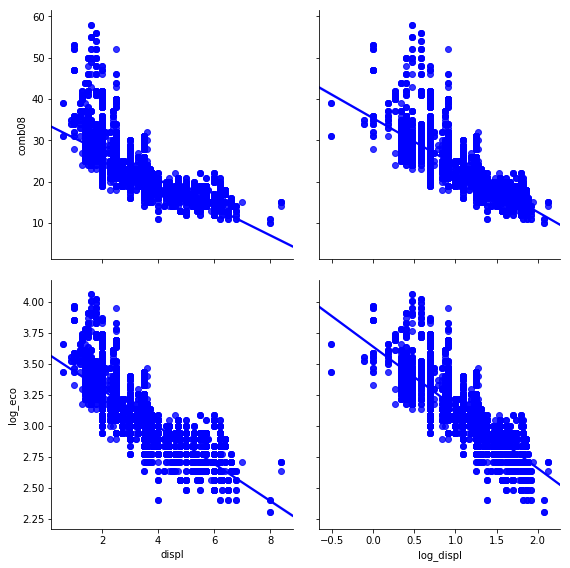

In [82]:
g = sns.PairGrid(data2, y_vars=["comb08", "log_eco"], x_vars=["displ", "log_displ"], size=4)
g.map(sns.regplot, color="blue")#".2")
#g.set(ylim=(-1, 11), yticks=[0, 5, 10]);
#sns.plt.show()

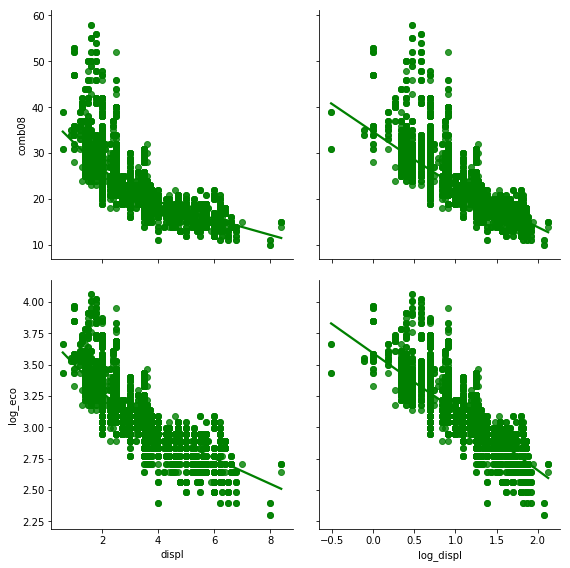

In [83]:
g = sns.PairGrid(data2, y_vars=["comb08", "log_eco"], x_vars=["displ", "log_displ"], size=4)
g.map(sns.regplot, lowess=True, color="green")

In [49]:
# linear model
import statsmodels.formula.api as smf
import statsmodels.api as sm
formula='comb08 ~ displ'
ols = smf.ols(formula=formula, data=data2).fit(cov_type='HC0')
resid = ols.resid
fitted = ols.fittedvalues
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     8350.
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        21:33:59   Log-Likelihood:                -20440.
No. Observations:                7287   AIC:                         4.088e+04
Df Residuals:                    7285   BIC:                         4.090e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.9578      0.144    235.197      0.000      33.675      34.241
displ         -3.3642      0.037    -91.378      0.000      -3.436      -3.292
==============================================================================
Omnibus:                     3557.337   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29071.551
Skew:                           2.184   Prob(JB):                         0.00
Kurtosis:                      11.757   Cond. No.                         9.35
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

The interpretation of the slope here is that: 

In [50]:
ols.mse_resid**0.5

3.9995668001533917

In [51]:
formula='comb08 ~ log_displ'
ols2 = smf.ols(formula=formula, data=data2).fit(cov_type='HC0')
resid2 = ols2.resid
fitted2 = ols2.fittedvalues
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 comb08   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     9669.
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        21:33:59   Log-Likelihood:                -19917.
No. Observations:                7287   AIC:                         3.984e+04
Df Residuals:                    7285   BIC:                         3.985e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.3643      0.152    232.820      0.000      35.067      35.662
log_displ    -11.3477      0.115    -98.330      0.000     -11.574     -11.122
==============================================================================
Omnibus:                     3673.716   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33749.554
Skew:                           2.229   Prob(JB):                         0.00
Kurtosis:                      12.554   Cond. No.                         5.25
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [52]:
ols2.mse_resid**0.5

3.7224146081368086

In [53]:
formula='log_eco ~ displ'
ols3 = smf.ols(formula=formula, data=data2).fit(cov_type='HC0')
resid3 = ols3.resid
fitted3 = ols3.fittedvalues
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_eco   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                 1.214e+04
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        21:33:59   Log-Likelihood:                 3829.9
No. Observations:                7287   AIC:                            -7656.
Df Residuals:                    7285   BIC:                            -7642.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5900      0.005    754.207      0.000       3.581       3.599
displ         -0.1494      0.001   -110.165      0.000      -0.152      -0.147
==============================================================================
Omnibus:                     1199.917   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2794.347
Skew:                           0.942   Prob(JB):                         0.00
Kurtosis:                       5.377   Cond. No.                         9.35
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [54]:
ols3.mse_resid**0.5

0.14307664715035326

In [55]:
formula='log_eco ~ log_displ'
ols4 = smf.ols(formula=formula, data=data2).fit(cov_type='HC0')
resid4 = ols4.resid
fitted4 = ols4.fittedvalues
ols4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_eco   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                 1.470e+04
Date:                Wed, 15 May 2019   Prob (F-statistic):               0.00
Time:                        21:33:59   Log-Likelihood:                 4163.1
No. Observations:                7287   AIC:                            -8322.
Df Residuals:                    7285   BIC:                            -8308.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6381      0.005    753.583      0.000       3.629       3.648
log_displ     -0.4903      0.004   -121.258      0.000      -0.498      -0.482
==============================================================================
Omnibus:                     1105.810   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2684.848
Skew:                           0.862   Prob(JB):                         0.00
Kurtosis:                       5.423   Cond. No.                         5.25
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [56]:
ols4.mse_resid**0.5

0.13668060070113575

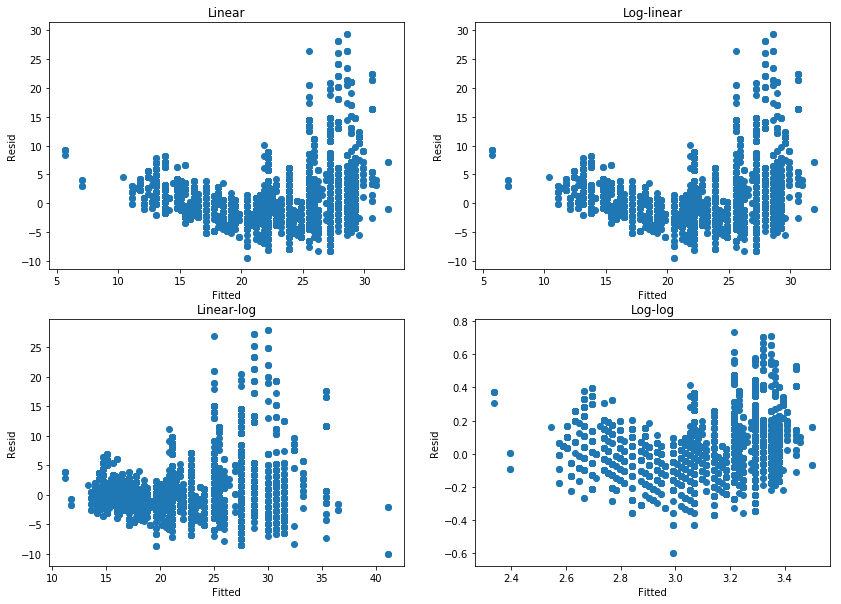

In [57]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.scatter(fitted,resid)
ax1.set(title='Linear', ylabel='Resid', xlabel='Fitted')
ax2.scatter(fitted,resid)
ax2.set(title='Log-linear', ylabel='Resid', xlabel='Fitted')
ax3.scatter(fitted2,resid2)
ax3.set(title='Linear-log', ylabel='Resid', xlabel='Fitted')
ax4.scatter(fitted3,resid3)
ax4.set(title='Log-log', ylabel='Resid', xlabel='Fitted')
plt.show()

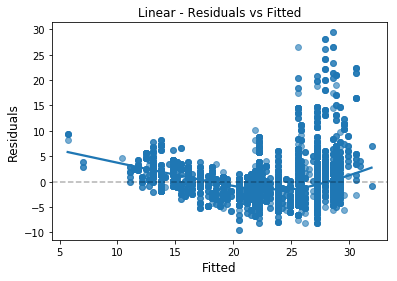

In [58]:
fig, ax= plt.subplots()
sns.regplot(fitted, resid, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Linear - Residuals vs Fitted')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

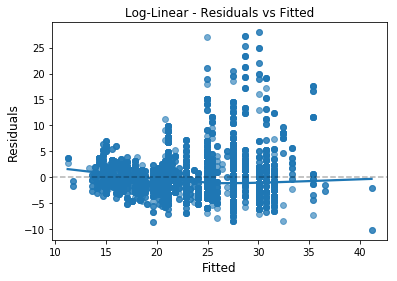

In [59]:
fig, ax= plt.subplots()
sns.regplot(fitted2, resid2, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Log-Linear - Residuals vs Fitted')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

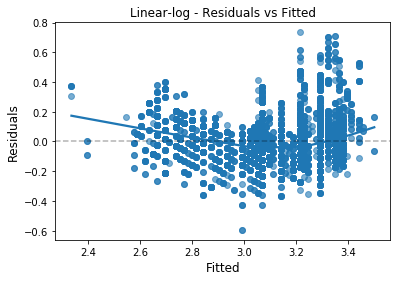

In [60]:
fig, ax= plt.subplots()
sns.regplot(fitted3, resid3, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Linear-log - Residuals vs Fitted')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

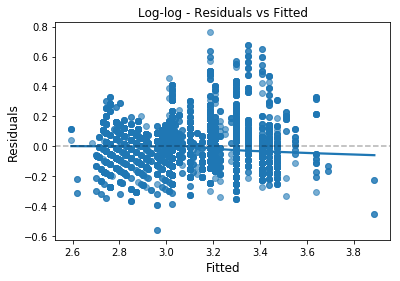

In [61]:
fig, ax= plt.subplots()
sns.regplot(fitted4, resid4, lowess=True, ax=ax, scatter_kws={'s': 35, 'alpha': .6})
ax.set_xlabel('Fitted',  {'fontsize': 12})
ax.set_ylabel('Residuals', {'fontsize': 12})
ax.set_title('Log-log - Residuals vs Fitted')
plt.axhline(color='Black', alpha=0.3, linestyle='--')  
plt.show()

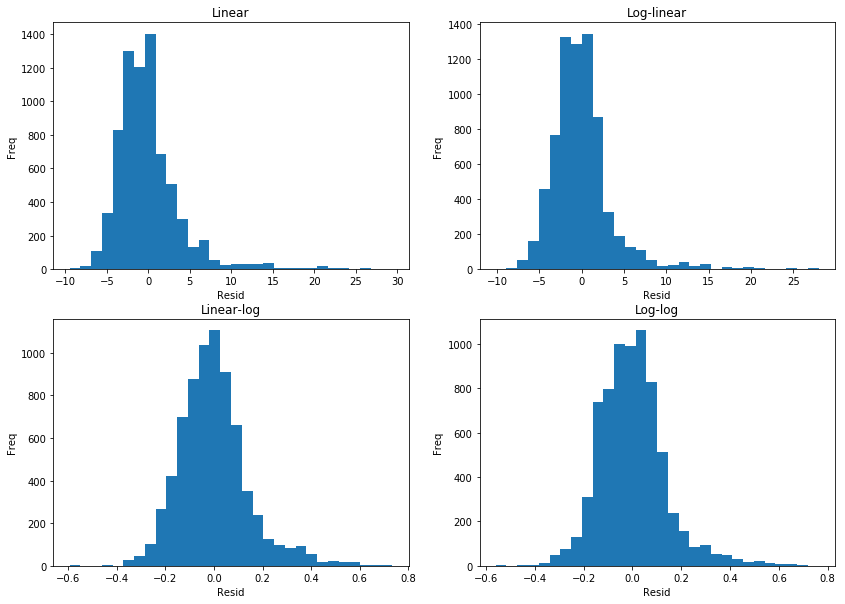

In [62]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.hist(resid, bins=30)
ax1.set(title='Linear', ylabel='Freq', xlabel='Resid')
ax2.hist(resid2, bins=30)
ax2.set(title='Log-linear', ylabel='Freq', xlabel='Resid')
ax3.hist(resid3, bins=30)
ax3.set(title='Linear-log', ylabel='Freq', xlabel='Resid')
ax4.hist(resid4, bins=30)
ax4.set(title='Log-log', ylabel='Freq', xlabel='Resid')
plt.show()

In [63]:
from scipy import stats
stats.describe(resid), stats.describe(resid2), stats.describe(resid3), stats.describe(resid4)

(DescribeResult(nobs=7287, minmax=(-9.500935765533683, 29.424941460093205), mean=-2.9798526149071856e-14, variance=15.994339072201226, skewness=2.183517835688747, kurtosis=8.756552444401466),
 DescribeResult(nobs=7287, minmax=(-10.1610498823336, 27.969114292794348), mean=2.8162337442326353e-14, variance=13.854468734673375, skewness=2.2290652484408273, kurtosis=9.554080721807141),
 DescribeResult(nobs=7287, minmax=(-0.5946539497335692, 0.7346460656553115), mean=-1.017742528406209e-15, variance=0.020468117334895147, skewness=0.9423456471102654, kurtosis=2.37722997699458),
 DescribeResult(nobs=7287, minmax=(-0.5604726541510838, 0.7624289453049098), mean=2.752414584008265e-15, variance=0.018679022569235496, skewness=0.8619183396922152, kurtosis=2.42302104176062))

## Bias correction:

In [64]:
eres3 = np.exp(resid3)
eres4 = np.exp(resid4)
n = 7244
fp3 = sum(eres3)/n
fp4 = sum(eres4)/n
fp31 = np.exp(ols3.mse_resid/2)
fp41 = np.exp(ols4.mse_resid/2)
fp3, fp31, fp4, fp41

(1.0167939163866462,
 1.0102880250137054,
 1.0157837295243357,
 1.0093845546629283)

In [65]:
TS_lin = fitted
TS_linlog = fitted2
TS_loglin = np.exp(fitted3)
TS_loglin3 = np.exp(fitted3) * fp3
TS_loglin31 = np.exp(fitted3) * fp31
TS_loglog = np.exp(fitted4)
TS_loglog4 = np.exp(fitted4) * fp4
TS_loglog41 = np.exp(fitted4) * fp41

In [66]:
stats.describe(data2['comb08'])

DescribeResult(nobs=7287, minmax=(10, 58), mean=23.286537669822973, variance=37.142699608208844, skewness=1.2065364174368092, kurtosis=3.0833940125801016)

In [67]:
var=36.70493125638623

In [68]:
res_loglin = data2['comb08']-TS_loglin
np.sqrt(sum(res_loglin**2)/(n-2)), 1 - sum(res_loglin**2)/((n-1)*var), 1 - sum(res_loglin**2)/(n-2)/var

(3.8796716588622253, 0.5899795057114137, 0.5899228886865189)

In [69]:
res_loglin3 = data2['comb08']-TS_loglin3
np.sqrt(sum(res_loglin3**2)/(n-2)), 1 - sum(res_loglin3**2)/((n-1)*var), 1 - sum(res_loglin3**2)/(n-2)/var

(3.8645980428295394, 0.5931594062620706, 0.593103228328663)

In [70]:
res_loglin31 = data2['comb08']-TS_loglin31
np.sqrt(sum(res_loglin31**2)/(n-2)), 1 - sum(res_loglin31**2)/((n-1)*var), 1 - sum(res_loglin31**2)/(n-2)/var

(3.8656708837650187, 0.5929334910063504, 0.5928772818777956)

In [71]:
res_loglog = data2['comb08']-TS_loglog
np.sqrt(sum(res_loglog**2)/(n-2)), 1 - sum(res_loglog**2)/((n-1)*var), 1 - sum(res_loglog**2)/(n-2)/var

(3.7175838355931305, 0.6235241153380658, 0.6234721302669995)

In [72]:
res_loglog4 = data2['comb08']-TS_loglog4
np.sqrt(sum(res_loglog4**2)/(n-2)), 1 - sum(res_loglog4**2)/((n-1)*var), 1 - sum(res_loglog4**2)/(n-2)/var

(3.712266619621414, 0.6246002831381302, 0.6245484466679753)

In [73]:
res_loglog41 = data2['comb08']-TS_loglog41
np.sqrt(sum(res_loglog41**2)/(n-2)), 1 - sum(res_loglog41**2)/((n-1)*var), 1 - sum(res_loglog41**2)/(n-2)/var

(3.7099108144306956, 0.6250765894393278, 0.6250248187391674)

|Estimate   |$SER$|$R^2$|$R_{adj.}^2$|
|-------|-------|----------|------|
|Without bias correction|   |   |   |
|Linear model|3.981|0.568|0.568|
|linear-log model|3.724|0.622|0.622|
|log-linear model|3.86|0.595|0.595|
|log-linear model(normal bc)|3.843|0.598|0.598|
|log-linear model(Duan bc)|3.843|0.598|0.598|
|log-log model|3.724|0.622|0.622|
|log-log model(normal bc)|3.717|0.624|0.624|
|log-log model(Duan bc)| 3.717|0.624|0.624|